## Day1:   (___Num 4 ML___)
--------

#### Linear Algebra for Linear Regression

```markdown
Loading the base modules 
if you have problem during install or loading these modules, please ask!   @Dan7h3x (Telegram)
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Now let learn to open and save Dataset from files
>> `in this example file format is txt`

In [2]:
Data = np.loadtxt("./Datasets/TempLinkoping2016.txt",dtype=str)
Data = Data[1:,:]
Time = np.array([float(i) for i in Data[:,0]])
Temp = np.array([float(i) for i in Data[:,1]])

### Lets see a visualization of Data

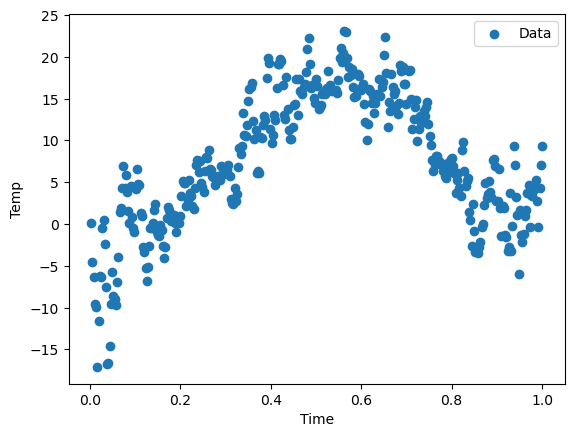

In [3]:
plt.scatter(Time,Temp,label="Data")
plt.xlabel("Time")
plt.ylabel("Temp")
plt.legend()
plt.show()

### Linear Regression problem

$$ \hat{y} \approx \alpha \boldsymbol{x} + \beta $$

with taking ${1,x}$ as basis we create matrix form of __Linear Regression__
$$ A  \begin{bmatrix} \alpha\\ \beta \end{bmatrix} = \boldsymbol{y} $$

In [4]:
A = np.vstack((Time**2,Time,np.ones_like(Time))).T

Coeffs = np.linalg.pinv(A) @ Temp

TempPred = Coeffs @ A.T


In [5]:
Time.shape

(366,)

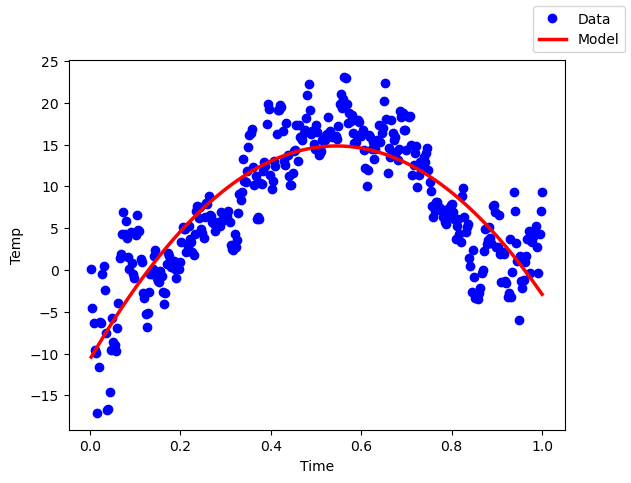

In [6]:
fig = plt.figure(figsize=plt.figaspect(0.75))

ax = fig.add_subplot(1,1,1)
ax.plot(Time,Temp,'bo',label="Data")
ax.plot(Time,TempPred,lw=2.5,color='red',label="Model")
ax.set_xlabel("Time")
ax.set_ylabel("Temp")
fig.legend()

plt.show()

In [7]:
R = A @ Coeffs - Temp
print(f"The Residual norm is {np.linalg.norm(R.T @ A,2)}")

The Residual norm is 3.867471937636514e-12


### Cholesky

In [8]:
L = np.linalg.cholesky(A.T @ A)
Coeffs2 = np.linalg.pinv(L).T @ np.linalg.pinv(L) @ A.T @ Temp
print(f"The Normal solution is {Coeffs}\n and Cholesky solution is {Coeffs2}.")

The Normal solution is [-85.83108867  93.59796369 -10.67535216]
 and Cholesky solution is [-85.83108867  93.59796369 -10.67535216].


## To See default `epsilon` of numpy use this

In [11]:
np.finfo(float).eps

2.220446049250313e-16